# Adversarial Example Generation for Images

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pdb
import pandas as pd
import numpy as np

from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
import torch
import torch.tensor as T
from torch import nn, optim
from torch.nn import functional as F

from torch.utils.data import DataLoader, Dataset, RandomSampler
from torchvision import transforms, models
from torchvision.datasets import ImageFolder

print(f"GPU present: {torch.cuda.is_available()}")

GPU present: True


In [4]:
img_size=(150,150)
imgnet_stats = dict(mean=T([0.485, 0.456, 0.406]), std=T([0.229, 0.224, 0.225]))
data_path = Path('./data')

In [5]:
def for_disp(img):
  img.mul_(imgnet_stats['std'][:, None, None]).add_(imgnet_stats['mean'][:, None, None])
  return transforms.ToPILImage()(img)

In [6]:
train_tfms = transforms.Compose(
  [
    transforms.Resize(img_size),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(**imgnet_stats),    
  ]
)

pred_tfms = transforms.Compose(
  [
    transforms.Resize(img_size),
    transforms.ToTensor(),
    transforms.Normalize(**imgnet_stats)
  ]
)

In [8]:
train_ds = ImageFolder(data_path/'train', transform=train_tfms)
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True, drop_last=True)
train_itr = iter(train_dl)

val_ds = ImageFolder(data_path/'val', transform=pred_tfms)
val_dl = DataLoader(val_ds, batch_size=32)
val_itr = iter(val_dl)

In [11]:
imgs, labels = next(val_itr)

buildings


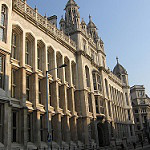

In [12]:
idx = np.random.randint(len(imgs))

print(train_ds.classes[labels[idx].item()])
img = for_disp(imgs[idx])
img